In [1]:
import pandas as pd
import numpy as np
import glob, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(r'..')

In [2]:
from modules.plotting_metrics import PlotMetric
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Tres casos de Truchon y Bayly

In [4]:
# Aplicados a la proporción (R_a) de CSARb

In [5]:
N_csar = 111
n_csar = 26
# Creamos el arreglo de valores verdaderos:
y_true_csar = np.array([1 if i < n_csar else 0 for i in range (N_csar)])

In [6]:
N_dud = 2146
n_dud = 72
y_true_dud = np.array([1 if i < n_dud else 0 for i in range (N_dud)])

In [7]:
# Tres casos mencionados por Truchon y Bayley

In [8]:
from truchon_2006_3_ranking_cases import get_three_ranking_cases

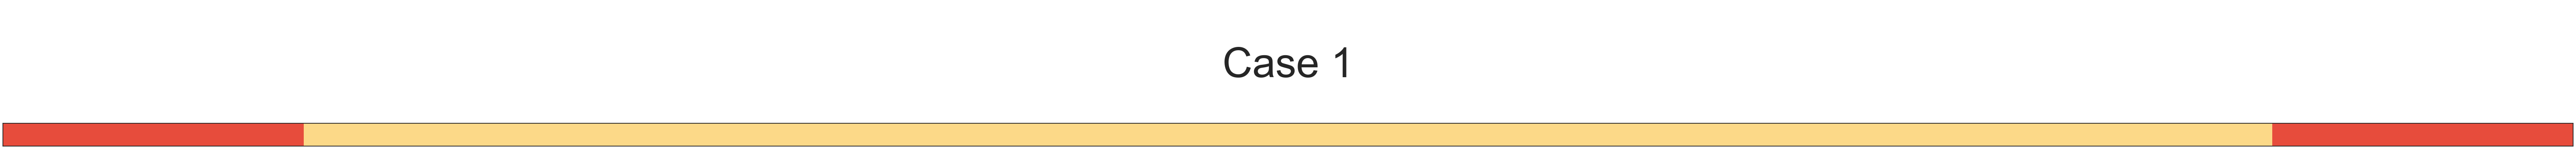

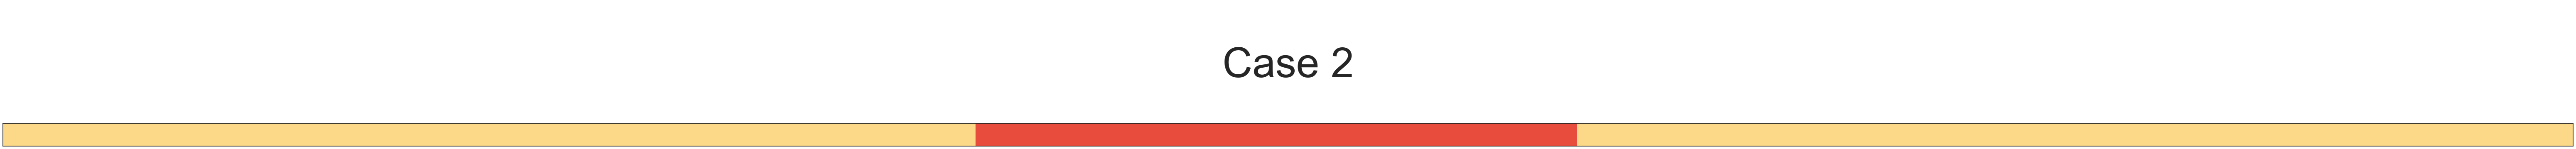

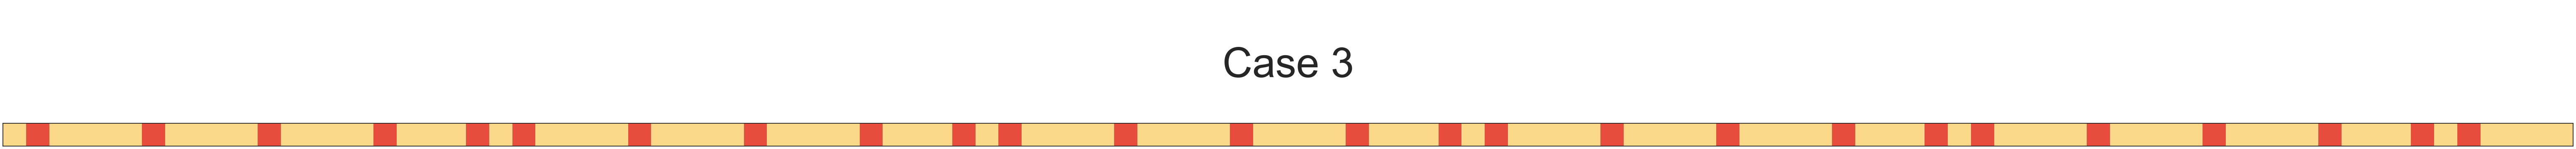

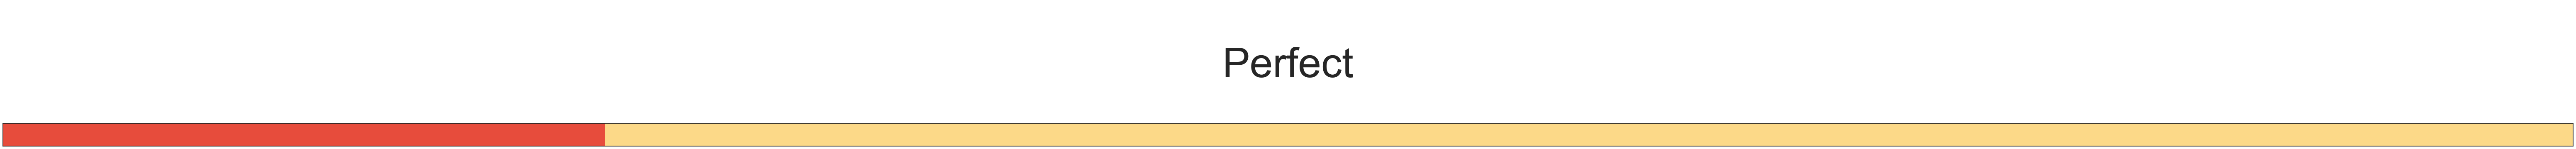

In [9]:
csar_cases_preds = get_three_ranking_cases(y_true_csar, include_optimal = True)
csar_cases = PlotMetric(y_true = y_true_csar, y_pred_dict = csar_cases_preds)
csar_cases.plot_actives_distribution()

In [10]:
dud_cases_preds = get_three_ranking_cases(y_true_dud, include_optimal = True)
dud_cases = PlotMetric(y_true = y_true_dud, y_pred_dict = dud_cases_preds)

In [11]:
def get_auac(y_true, y_pred, decreasing = False, normalized = True):
    N = len(y_true)
    n = sum(y_true == 1)
    if decreasing:
        order = np.argsort(y_pred)
    else:
        order = np.argsort(- y_pred)
    y_pred_ord = y_pred[order]
    y_true_ord = y_true[order]
    
    ranking_pos = np.linspace(0, N, N + 1)
    
    n_counter = 0
    f_k = np.zeros(N + 1)
    
    for i, k in enumerate(y_true_ord):
        if k: # If is active
            n_counter += 1
        f_k[i + 1] = n_counter
        
    if normalized:
        ranking_pos = ranking_pos / N
        f_k = f_k / n
    return ranking_pos, f_k

0.59


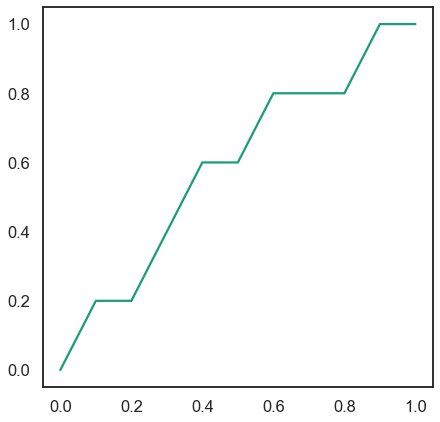

In [12]:
y_true = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
y_pred = -1*np.array([1, 3, 4, 6, 9, 2, 5, 7, 8, 10])
x, y = get_auac(y_true = y_true, y_pred = y_pred, normalized=True)
from sklearn.metrics import auc
print(auc(x, y))
plt.plot(x, y)

0.5


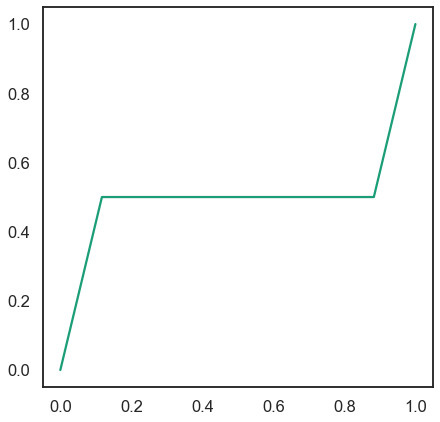

In [13]:
x, y = get_auac(y_true = y_true_csar, y_pred = csar_cases_preds['Case 1'])
from sklearn.metrics import auc
print(auc(x, y))
plt.plot(x, y)

In [14]:
# ROC-AUC

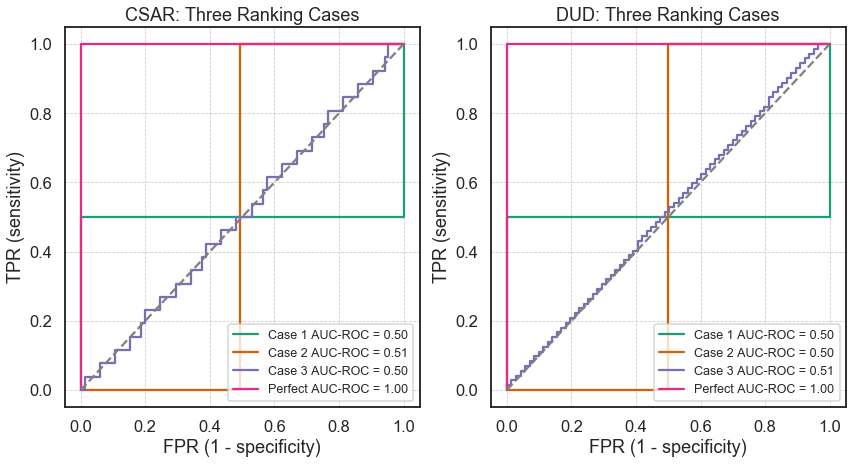

In [15]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
csar_cases.plot_roc_auc(title='CSAR: Three Ranking Cases', fontsize='x-small', show_by_itself = False)
plt.subplot(1,2,2)
dud_cases.plot_roc_auc(title='DUD: Three Ranking Cases', fontsize='x-small', show_by_itself = False)
plt.show();

In [16]:
print('ROC-AUC CSAR')
csar_cases.format_metric_results('roc_auc', transposed=False)
print('ROC-AUC DUD')
dud_cases.format_metric_results('roc_auc', transposed=False)

ROC-AUC CSAR


,Case 1,Case 2,Case 3,Perfect
ROC AUC,0.5,0.506,0.502,1.0


ROC-AUC DUD


,Case 1,Case 2,Case 3,Perfect
ROC AUC,0.5,0.5,0.514,1.0


In [17]:
# Precision and Recall

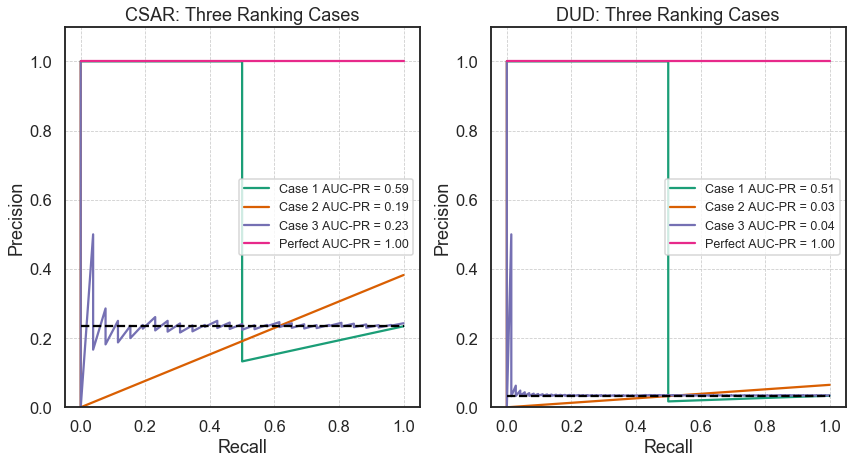

In [18]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
csar_cases.plot_pr_auc(title='CSAR: Three Ranking Cases', fontsize='x-small', show_by_itself = False)
plt.subplot(1,2,2)
dud_cases.plot_pr_auc(title='DUD: Three Ranking Cases', fontsize='x-small', show_by_itself = False)
plt.show();

In [19]:
print('Precision/Recall AUC CSAR')
csar_cases.format_metric_results('pr_auc', transposed=False)
print('Precision/Recall DUD')
dud_cases.format_metric_results('pr_auc', transposed=False)

Precision/Recall AUC CSAR


,Case 1,Case 2,Case 3,Perfect
PR AUC,0.592,0.191,0.233,1.0


Precision/Recall DUD


,Case 1,Case 2,Case 3,Perfect
PR AUC,0.513,0.032,0.038,1.0


In [20]:
# Enrichment Factor

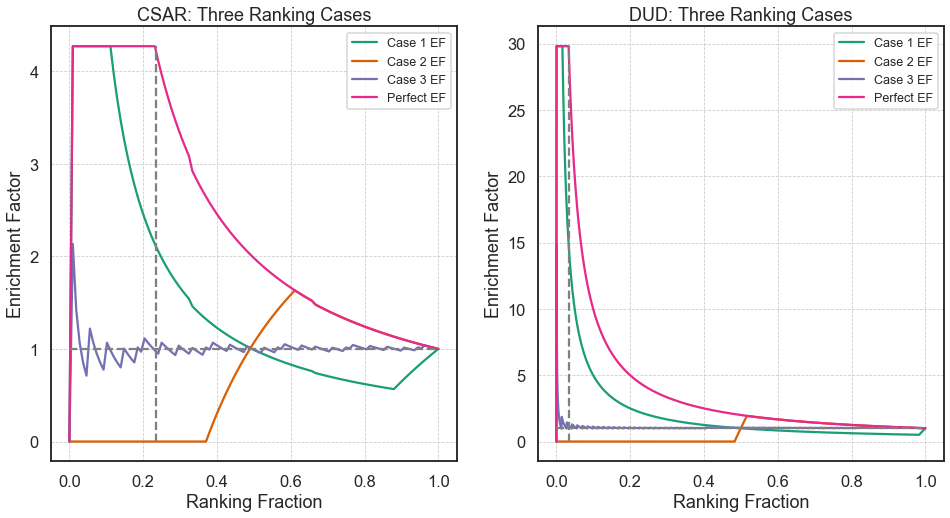

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
csar_cases.plot_ef_auc(title='CSAR: Three Ranking Cases', method = 'absolute',
                       fontsize='x-small', show_by_itself = False)
plt.subplot(1,2,2)
dud_cases.plot_ef_auc(title='DUD: Three Ranking Cases', method = 'absolute',
                      fontsize='x-small', show_by_itself = False)
plt.show();

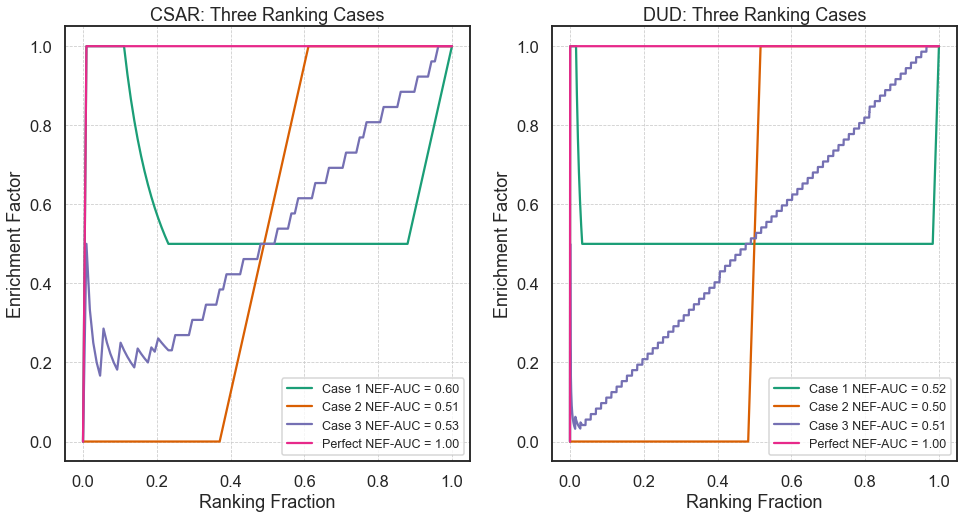

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
csar_cases.plot_ef_auc(title='CSAR: Three Ranking Cases', method = 'normalized',
                       fontsize='x-small', show_by_itself = False)
plt.subplot(1,2,2)
dud_cases.plot_ef_auc(title='DUD: Three Ranking Cases', method = 'normalized',
                      fontsize='x-small', show_by_itself = False)
plt.show();

In [23]:
print('Precision/Recall AUC CSAR')
fractions = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
csar_cases.get_efs(method = 'normalized', fractions=fractions)
print('Precision/Recall DUD')
dud_cases.get_efs(method = 'normalized', fractions=fractions)

Precision/Recall AUC CSAR


,Case 1,Case 2,Case 3,Perfect,#ligs at X%
NEF at 0.5%,0.00,0.0,0.00,0.0,0.0
NEF at 1.0%,1.00,0.0,0.50,1.0,1.0
NEF at 2.0%,1.00,0.0,0.33,1.0,2.0
NEF at 5.0%,1.00,0.0,0.17,1.0,5.0
NEF at 10.0%,1.00,0.0,0.25,1.0,11.0
NEF at 20.0%,0.57,0.0,0.26,1.0,22.0


Precision/Recall DUD


,Case 1,Case 2,Case 3,Perfect,#ligs at X%
NEF at 0.5%,1.00,0.0,0.09,1.0,10.0
NEF at 1.0%,1.00,0.0,0.05,1.0,21.0
NEF at 2.0%,0.84,0.0,0.05,1.0,42.0
NEF at 5.0%,0.50,0.0,0.06,1.0,107.0
NEF at 10.0%,0.50,0.0,0.11,1.0,214.0
NEF at 20.0%,0.50,0.0,0.21,1.0,429.0


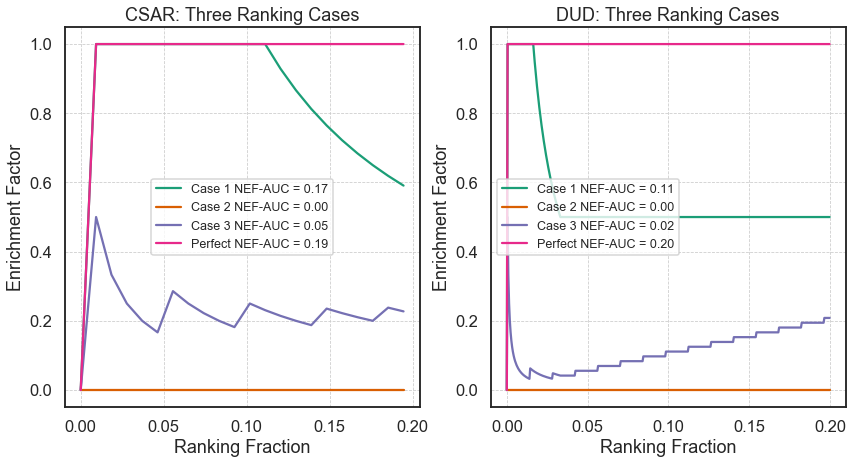

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
csar_cases.plot_ef_auc(title='CSAR: Three Ranking Cases', 
                       method = 'normalized', max_chi = 0.2,
                       fontsize='x-small', show_by_itself = False)
plt.subplot(1,2,2)
dud_cases.plot_ef_auc(title='DUD: Three Ranking Cases', 
                      method = 'normalized', max_chi = 0.2,
                      fontsize='x-small', show_by_itself = False)
plt.show();

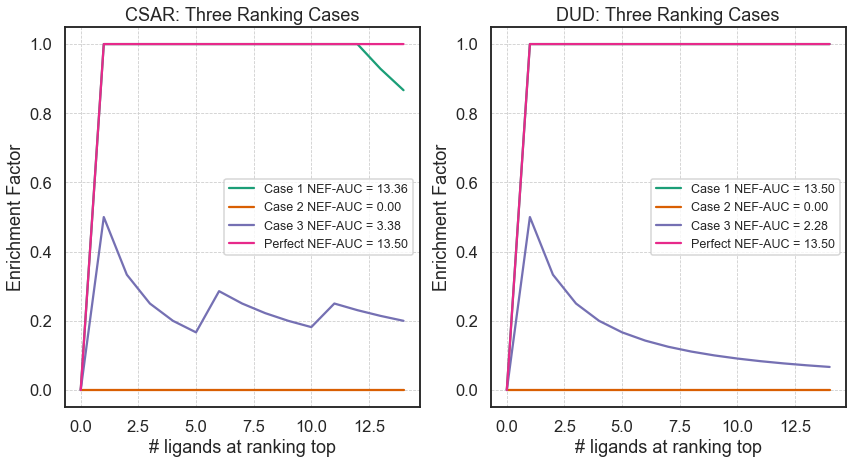

In [25]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
csar_cases.plot_ef_auc(title='CSAR: Three Ranking Cases', 
                       method = 'normalized', max_num_of_ligands = 15,
                       fontsize='x-small', show_by_itself = False)
plt.subplot(1,2,2)
dud_cases.plot_ef_auc(title='DUD: Three Ranking Cases', 
                      method = 'normalized', max_num_of_ligands = 15, 
                      fontsize='x-small', show_by_itself = False)
plt.show();